In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('sudutInduksi.xlsx')

In [4]:
df

,Angle,Inductance
0,0,0.18
1,5,0.18
2,10,0.20
3,15,0.22
4,20,0.24
...,...,...
95,475,0.17
96,480,0.17
97,485,0.17
98,490,0.17


In [5]:
import matplotlib.pyplot as plt

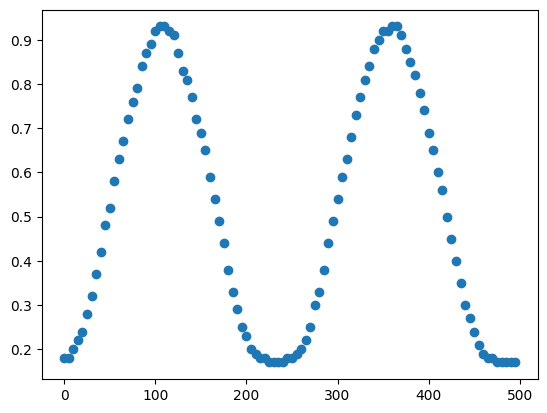

In [6]:
plt.scatter(df['Angle'], df['Inductance'])

Fourier Series Equation (θ in degrees):
L(θ) = 0.5091 + -0.3538 * cos(1 * θ * π / 125) + 0.1587 * sin(1 * θ * π / 125) + 0.0203 * cos(2 * θ * π / 125) + -0.0239 * sin(2 * θ * π / 125) + 0.0027 * cos(3 * θ * π / 125) + -0.0085 * sin(3 * θ * π / 125) + -0.0017 * cos(4 * θ * π / 125) + -0.0105 * sin(4 * θ * π / 125) + 0.0009 * cos(5 * θ * π / 125) + 0.0012 * sin(5 * θ * π / 125)
Mean Squared Error (MSE): 0.000040


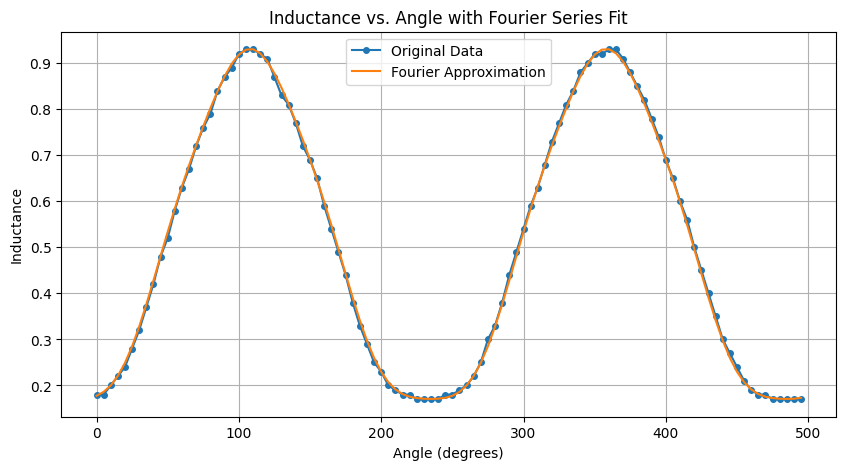

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Angle' and 'Inductance' columns
angles = df['Angle'].values.astype(float)  # Convert to float
inductance = df['Inductance'].values.astype(float)  # Convert to float

# Parameters
L = 125  # Half the period (assuming period 2L = 250 degrees based on data range)
n_harmonics = 5  # Number of harmonics to include

# Compute Fourier coefficients
a0 = np.mean(inductance)  # DC component
a_n = []
b_n = []

for n in range(1, n_harmonics + 1):
    # Compute a_n (cosine coefficients) - match MIT form simplified with mean
    cos_term = inductance * np.cos(n * np.pi * angles / L)
    a_n.append(2 * np.mean(cos_term))  # Factor of 2 for half-range expansion
    
    # Compute b_n (sine coefficients)
    sin_term = inductance * np.sin(n * np.pi * angles / L)
    b_n.append(2 * np.mean(sin_term))  # Factor of 2 for half-range expansion

# Construct the Fourier series equation
equation = f"L(θ) = {a0:.4f}"
for n in range(1, n_harmonics + 1):
    if abs(a_n[n-1]) > 1e-4:  # Include only significant terms
        equation += f" + {a_n[n-1]:.4f} * cos({n} * θ * π / {L})"
    if abs(b_n[n-1]) > 1e-4:
        equation += f" + {b_n[n-1]:.4f} * sin({n} * θ * π / {L})"

# Print the equation
print("Fourier Series Equation (θ in degrees):")
print(equation)

# Reconstruct the signal
reconstructed = np.zeros_like(inductance)
reconstructed += a0
for n in range(1, n_harmonics + 1):
    reconstructed += a_n[n-1] * np.cos(n * np.pi * angles / L)
    reconstructed += b_n[n-1] * np.sin(n * np.pi * angles / L)

# Calculate Mean Squared Error (MSE)
mse = np.mean((inductance - reconstructed) ** 2)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Plot original and reconstructed data
plt.figure(figsize=(10, 5))
plt.plot(angles, inductance, '-o', label='Original Data', markersize=4)
plt.plot(angles, reconstructed, '-', label='Fourier Approximation')
plt.title('Inductance vs. Angle with Fourier Series Fit')
plt.xlabel('Angle (degrees)')
plt.ylabel('Inductance')
plt.legend()
plt.grid(True)
plt.show()